##### Load the dataset

In [21]:
#Load the libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR

from sklearn import metrics
from sklearn import pipeline


In [22]:
# Load the dataset
dataset = pd.read_csv('housing.csv')
dataset.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


##### Analyze the data using descriptive statistics

In [23]:
print dataset.shape

(489, 4)


In [24]:
dataset.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [25]:
dataset.info()
print "------"

dataset.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB
------


RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

Now, let’s now take a look at the correlation between all of the numeric attributes

In [26]:
#correlation
dataset.corr(method='pearson')

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


##### Data Visualizations

**Unimodal Data Visualizations** <br>
Let’s look at visualizations of individual attributes. It is often useful to look at your data using multiple different visualizations in order to spark ideas. Let’s look at histograms of each attribute to get a sense of the data distributions.

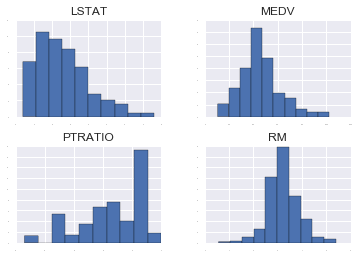

In [27]:
#histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

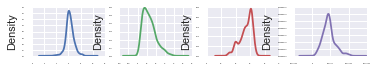

In [28]:
# density
dataset.plot(kind= 'density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=2)
plt.show()

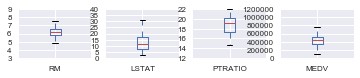

In [29]:
# box and whisker plots
dataset.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
plt.show()

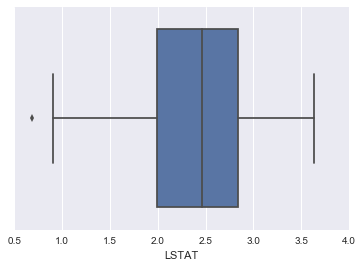

In [30]:
sns.boxplot(np.log(dataset.LSTAT))

In [31]:
print "Skew:", dataset.skew()
print "-----------------"
dataset.kurt()

Skew: RM         0.081565
LSTAT      0.905561
PTRATIO   -0.820578
MEDV       0.775082
dtype: float64
-----------------


RM         1.886990
LSTAT      0.493783
PTRATIO   -0.180938
MEDV       1.041615
dtype: float64

**Multimodal Data Visualizations**

Let’s look at some visualizations of the interactions between variables. The best place to start is a scatter plot matrix or pair plot.

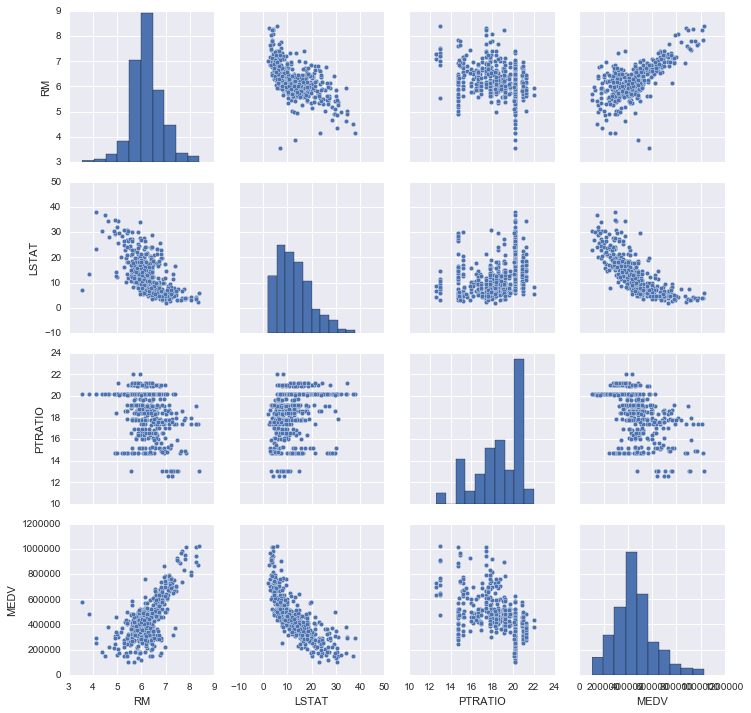

In [32]:
sns.pairplot(dataset)

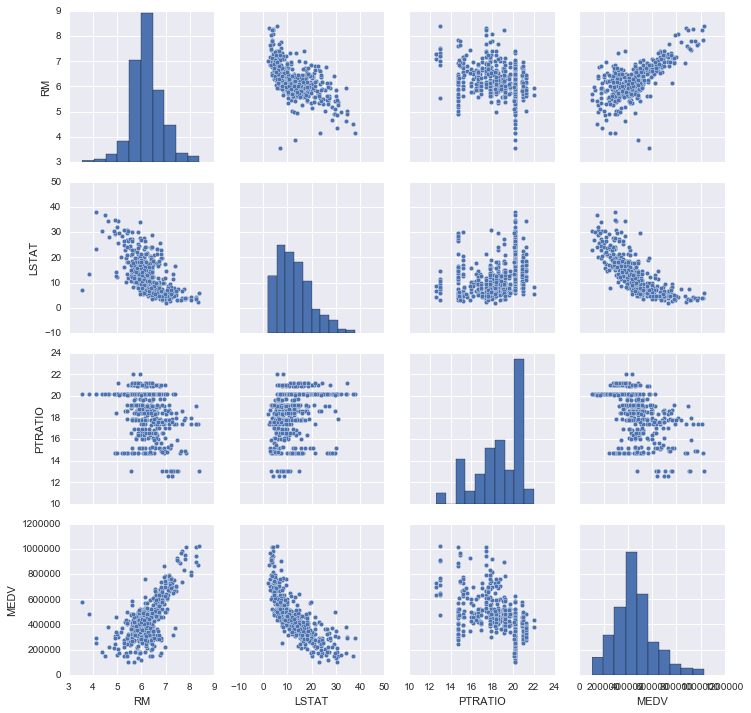

In [33]:
sns.pairplot(dataset)

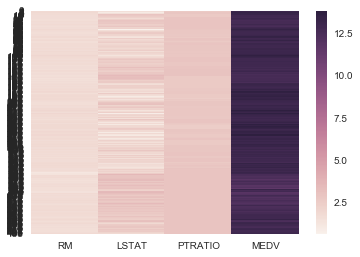

In [34]:
#correlation_matrix
sns.heatmap(np.log(dataset))

##### Summary of ideas
We need to think about transforms that we could use later to better expose the structure which in turn may improve modeling accuracy. So far it would be worth trying: <br>
1. Feature selection and removing the most correlated attributes.<br>
2. Normalizing the dataset to reduce the effect of differing scales.<br>
3. Standardizing the dataset to reduce the effects of differing distributions.<br>

With lots of additional time I would also explore the possibility of binning (discretization) of the data. This can often improve accuracy for decision tree algorithms.

##### Validation Dataset 
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation

In [35]:
# Split-out validation dataset
prices = dataset['MEDV']
features = dataset.drop('MEDV', axis = 1)
    
test_size = .20
seed = 1

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(features, prices, test_size=.2, random_state=seed)

##### Evaluate Algorithms: Baseline
We have no idea what algorithms will do well on this problem. Gut feel suggests regression algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision trees and even SVM may do well. I have no idea.We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [36]:
# Test options and evaluation metric

num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

**Linear Algorithms:** Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN). <br>
**Nonlinear Algorithms:** Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [37]:
# Spot-Check Algorithms
models = []
models.append(( 'LR', linear_model.LinearRegression()))
models.append(( 'LASSO' , linear_model.Lasso()))
models.append(( 'EN', linear_model.ElasticNet()))
models.append((  'KNN' , KNeighborsRegressor()))
models.append(( 'CART' , DecisionTreeRegressor()))
models.append((  'SVR' , SVR()))

In [38]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=num_folds, random_state=seed) 
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -8014715019.494565 (2692404498.830443)
LASSO: -8014728819.310641 (2692392811.269502)
EN: -8635540922.942459 (2636899267.507737)
KNN: -6530328056.538462 (1492183658.157850)
CART: -7491035192.307692 (1156316130.506696)
SVR: -27715268947.606884 (7086166874.792150)


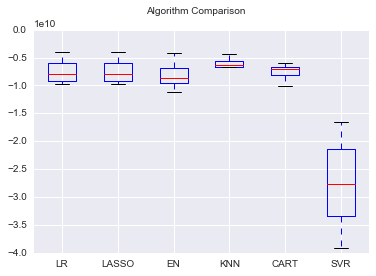

In [39]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see similar distributions for the regression algorithms and perhaps a tighter distribution of scores for CART.
The differing scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN. In the next section we will look at running the same algorithms using a standardized copy of the data.

##### Evaluate Algorithms: Standardization

We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data.

**Results from Evaluating Algorithms On Standardized Dataset.**

In [47]:
# Standardize the dataset
pipelines = []
pipelines.append(( 'ScaledLR', pipeline.Pipeline([( 'Scaler', preprocessing.StandardScaler()),( 'LR', linear_model.LinearRegression())])))
pipelines.append(( 'ScaledLASSO', pipeline.Pipeline([( 'Scaler', preprocessing.StandardScaler()),( 'LASSO', linear_model.Lasso())])))
pipelines.append(( 'ScaledEN', pipeline.Pipeline([( 'Scaler', preprocessing.StandardScaler()),( 'EN' ,
linear_model.ElasticNet())])))
pipelines.append(( 'ScaledKNN' , pipeline.Pipeline([( 'Scaler', preprocessing.StandardScaler()),( 'KNN',
KNeighborsRegressor())])))
pipelines.append(( 'ScaledCART' , pipeline.Pipeline([( 'Scaler' , preprocessing.StandardScaler()),('CART' ,
DecisionTreeRegressor())])))
pipelines.append(( 'ScaledSVR' , pipeline.Pipeline([('Scaler' , preprocessing.StandardScaler()),( 'SVR' , SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -8014715019.494566 (2692404498.830440)
ScaledLASSO: -8014730714.316923 (2692413715.004566)
ScaledEN: -8779309311.767750 (2414185217.593552)
ScaledKNN: -5009393936.076922 (1549277421.434016)
ScaledCART: -7969322590.384616 (1127110191.547898)
ScaledSVR: -27707850297.586845 (7085121572.785922)


Let’s take a look at the distribution of the scores across the cross validation folds.

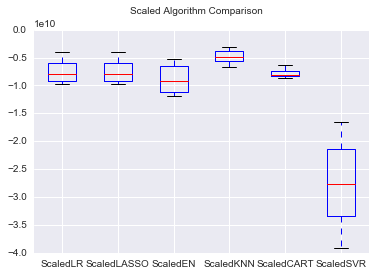

In [49]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Visualzie the Differences in Algorithm Performance on Standardized Dataset.

##### Improve Results With Tuning

The default value for the number of neighbors in KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross
validation on a standardized copy of the training dataset.

In [52]:
#KNN Algorithm tuning
scaler = preprocessing.StandardScaler().fit(X_train)
rescaledX  = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
grid = model_selection.GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

Tune the Parameters of the KNN Algorithm on the Standardized Dataset.

We can display the mean and standard deviation scores as well as the best performing value for k below.

In [55]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -4936468281.329924 using {'n_neighbors': 5}
-8263370025.575448 (1735262922.264505) with: {'n_neighbors': 1}
-5399833836.317136 (1407373738.589584) with: {'n_neighbors': 3}
-4936468281.329924 (1498797417.333675) with: {'n_neighbors': 5}
-5061220204.603580 (1556260269.897293) with: {'n_neighbors': 7}
-4991295814.151748 (1301399018.265155) with: {'n_neighbors': 9}
-4985751874.616898 (1247495172.693944) with: {'n_neighbors': 11}
-5098508989.240152 (1422558829.832998) with: {'n_neighbors': 13}
-5178374639.386189 (1359963346.080566) with: {'n_neighbors': 15}
-5174862221.524084 (1319344088.532788) with: {'n_neighbors': 17}
-5181824202.449858 (1362723949.316671) with: {'n_neighbors': 19}
-5286837058.823529 (1355402460.685401) with: {'n_neighbors': 21}


You can see that the best for k (n neighbors) is 5 providing a mean squared error of -4936.., the best so far.

##### Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods: <br>
1. Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM). <br>
2. Bagging Methods: Random Forests (RF) and Extra Trees (ET).<br>

We will use the same test harness as before, 10-fold cross validation and pipelines that standardize the training data for each fold.

In [60]:
# ensembles
#Evaluate Ensemble Algorithms on the Standardized Dataset.

ensembles = []

ensembles.append(('ScaledAB', pipeline.Pipeline([( 'Scaler' , preprocessing.StandardScaler()),('AB', ensemble.AdaBoostRegressor())])))

ensembles.append(('ScaledGBM', pipeline.Pipeline([('Scaler', preprocessing.StandardScaler()),('GBM' , ensemble.GradientBoostingRegressor())])))

ensembles.append(('ScaledRF', pipeline.Pipeline([('Scaler', preprocessing.StandardScaler()),('RF', ensemble.RandomForestRegressor())])))

ensembles.append(('ScaledET', pipeline.Pipeline([('Scaler' , preprocessing.StandardScaler()),( 'ET' ,ensemble.ExtraTreesRegressor())])))

results = []
names = []

for name, model in ensembles: 
    kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -5088890730.079138 (1327986145.758805)
ScaledGBM: -4447281101.754723 (1228168831.669965)
ScaledRF: -5330180092.326922 (1586450725.526989)
ScaledET: -5236027692.000000 (1448004293.093222)


Running the example calculates the mean squared error for each method using the default parameters. We can see that we’re generally getting better scores than our linear and nonlinear
algorithms in previous sections.

We can also plot the distribution of scores across the cross validation folds.

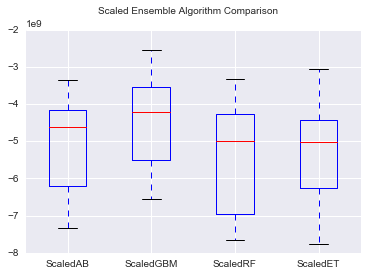

In [61]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Scaled Ensemble Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Visualzie the Differences in Ensemble Algorithm Performance on Standardized Dataset.

##### Tune Ensemble Methods